In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#import csv
df = pd.read_csv("market data raw scraped.csv")
df.head()

,Unnamed: 0,year,transmission,price,mileage,desc
0,0,2021,Automatic,"PHP 598,000","0-10,000 km",2021 Toyota Vios 1.3xle very fresh must see Auto
1,1,2021,Automatic,"PHP 579,000","10,001-20,000 km",2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto
2,2,2021,Automatic,"PHP 680,000","10,001-20,000 km",Toyota Vios 1.3 XLE Auto
3,3,2021,Automatic,"PHP 628,000","0-10,000 km",2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...
4,4,2020,Automatic,"PHP 698,000","10,001-20,000 km",2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    192 non-null    int64 
 1   year          192 non-null    int64 
 2   transmission  192 non-null    object
 3   price         192 non-null    object
 4   mileage       192 non-null    object
 5   desc          192 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.1+ KB


In [4]:
#drop unnamed: 0 column
df = df.drop(["Unnamed: 0"], axis = "columns")
df.head()

,year,transmission,price,mileage,desc
0,2021,Automatic,"PHP 598,000","0-10,000 km",2021 Toyota Vios 1.3xle very fresh must see Auto
1,2021,Automatic,"PHP 579,000","10,001-20,000 km",2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto
2,2021,Automatic,"PHP 680,000","10,001-20,000 km",Toyota Vios 1.3 XLE Auto
3,2021,Automatic,"PHP 628,000","0-10,000 km",2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...
4,2020,Automatic,"PHP 698,000","10,001-20,000 km",2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...


In [5]:
#convert price to numerical format
num_price = [x.split(" ")[1] for x in df.price]
df.price = num_price
#remove comma and convert to int dtype
df.price = df.price.str.replace(',', '').astype(int)
df.head()


,year,transmission,price,mileage,desc
0,2021,Automatic,598000,"0-10,000 km",2021 Toyota Vios 1.3xle very fresh must see Auto
1,2021,Automatic,579000,"10,001-20,000 km",2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto
2,2021,Automatic,680000,"10,001-20,000 km",Toyota Vios 1.3 XLE Auto
3,2021,Automatic,628000,"0-10,000 km",2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...
4,2020,Automatic,698000,"10,001-20,000 km",2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...


In [6]:
#display unique values under mileage column
df.mileage.unique()

array(['0-10,000 km', '10,001-20,000 km', '190,001-200,000 km',
       '20,001-30,000 km', '80,001-90,000 km', '40,001-50,000 km',
       '50,001-60,000 km', '60,001-70,000 km', '70,001-80,000 km',
       '90,001-100,000 km', '100,001-120,000 km', '140,001-150,000 km',
       '30,001-40,000 km', '120,001-130,000 km', '130,001-140,000 km',
       '150,001-160,000 km', '170,001-180,000 km'], dtype=object)

In [7]:
"""
I want to assign the mileage into a numerical value that's  why we will get the mean of the ranges
eg. 10,000 - 20,000 km converted to 15,000
"""
mileage_min = [int(x.split("-")[0].replace(",", "")) for x in df.mileage]
mileage_max = [int(x.replace(" ","-").split("-")[1].replace(',', '')) for x in df.mileage]
#convert list to array, get average and get floor value
mileage_ave = np.floor((np.array(mileage_max) + np.array(mileage_min))/2)
#convert to int dtype and replace values of mileage column

df.mileage = mileage_ave.astype(int)
df.head()


,year,transmission,price,mileage,desc
0,2021,Automatic,598000,5000,2021 Toyota Vios 1.3xle very fresh must see Auto
1,2021,Automatic,579000,15000,2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto
2,2021,Automatic,680000,15000,Toyota Vios 1.3 XLE Auto
3,2021,Automatic,628000,5000,2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...
4,2020,Automatic,698000,15000,2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...


In [8]:
"""
get the variant of toyota vios from the description string value
will do a one hot encode like label encoding where it will return a column per variant then return 1
when the variant word is detected and 0 if not
"""

variants = ["XLE", "XE", "J ", "E ", "G "]
for v in variants:
    find = [x.upper().find(v) for x in df.desc]
    int_label = [1 if x > 1 else 0 for x in find]
    df[v] = int_label
df.head()
#notice that if XLE is 1 then E is also 1 because of the value we passed on find function
#but this will be rectified when we merge using idmax(1)

,year,transmission,price,mileage,desc,XLE,XE,J,E,G
0,2021,Automatic,598000,5000,2021 Toyota Vios 1.3xle very fresh must see Auto,1,0,0,1,0
1,2021,Automatic,579000,15000,2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto,1,0,0,1,0
2,2021,Automatic,680000,15000,Toyota Vios 1.3 XLE Auto,1,0,0,1,0
3,2021,Automatic,628000,5000,2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...,1,0,0,1,0
4,2020,Automatic,698000,15000,2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...,0,0,0,0,1


In [9]:
"""
to increase the accuracy of the Machine Learning model that will be created in the later parts of this project
I decided to drop those rows without any variant
"""
df = df.loc[~((df["XLE"] == 0) & (df["XE"] == 0) & (df["J "] == 0) & 
                  (df["E "] == 0) & (df["G "] == 0)),:]
df.shape
#16 rows dropped

(176, 10)

In [10]:
#reverse get dummies using idxmax(1)
variants = df[["XLE","XE","J ","E ","G "]]
variant = pd.get_dummies(variants).idxmax(1)
df["variant"] = variant
df.head()

,year,transmission,price,mileage,desc,XLE,XE,J,E,G,variant
0,2021,Automatic,598000,5000,2021 Toyota Vios 1.3xle very fresh must see Auto,1,0,0,1,0,XLE
1,2021,Automatic,579000,15000,2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto,1,0,0,1,0,XLE
2,2021,Automatic,680000,15000,Toyota Vios 1.3 XLE Auto,1,0,0,1,0,XLE
3,2021,Automatic,628000,5000,2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...,1,0,0,1,0,XLE
4,2020,Automatic,698000,15000,2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...,0,0,0,0,1,G


In [11]:
#redo the get dummies
df = df.drop(["XLE","XE","J ","E ","G "], axis = "columns")
dummy = pd.get_dummies(df.variant)
df = pd.concat([df,dummy], axis="columns")
df

,year,transmission,price,mileage,desc,variant,E,G,J,XE,XLE
0,2021,Automatic,598000,5000,2021 Toyota Vios 1.3xle very fresh must see Auto,XLE,0,0,0,0,1
1,2021,Automatic,579000,15000,2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto,XLE,0,0,0,0,1
2,2021,Automatic,680000,15000,Toyota Vios 1.3 XLE Auto,XLE,0,0,0,0,1
3,2021,Automatic,628000,5000,2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...,XLE,0,0,0,0,1
4,2020,Automatic,698000,15000,2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...,G,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
186,2017,Manual,449000,45000,Toyota Vios 1.3 E VVTI Manual,E,1,0,0,0,0
188,2016,Manual,365000,175000,Toyota Vios 1.5 E (M),E,1,0,0,0,0
189,2017,Manual,440000,75000,Toyota Vios 1.5 E (M),E,1,0,0,0,0
190,2022,Automatic,658000,5000,Toyota Vios 1.3 XLE CVT Auto,XLE,0,0,0,0,1


In [12]:
#Clean the data
df.describe()

,year,price,mileage,E,G,J,XE,XLE
count,176.000000,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2005.789773,1.164859e+06,42528.409091,0.437500,0.136364,0.125000,0.022727,0.278409
std,152.113026,9.271938e+06,40767.624266,0.497494,0.344153,0.331662,0.149458,0.449495
min,0.000000,1.000000e+05,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,3.545000e+05,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,4.665000e+05,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,6.100000e+05,65000.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2022.000000,1.234568e+08,195000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#we see an entry with price which is 12 million. therefore we will also remove this
df.price.sort_values(ascending=False)

191    123456789
13        700000
172       699000
4         698000
112       688000
         ...    
70        140000
60        134000
170       114000
75        110000
57        100000
Name: price, Length: 176, dtype: int32

In [14]:
#remove outlier in price
df = df.loc[~(df.price == 123456789),:]
df.price.sort_values(ascending=False)

13     700000
172    699000
4      698000
112    688000
11     688000
        ...  
70     140000
60     134000
170    114000
75     110000
57     100000
Name: price, Length: 175, dtype: int32

In [15]:
#show the year values and their counts
#We can see an entry with 0 as year, this will need to be removed
df.year.value_counts()

2022    27
2021    24
2019    18
2018    18
2017    17
2016    14
2013    12
2015    10
2020     9
2008     7
2014     6
2012     4
2007     3
2010     2
0        1
2005     1
2011     1
2004     1
Name: year, dtype: int64

In [16]:
#remove outlier in year
df = df.loc[~(df.year == 0),:]
df.year.value_counts()

2022    27
2021    24
2019    18
2018    18
2017    17
2016    14
2013    12
2015    10
2020     9
2008     7
2014     6
2012     4
2007     3
2010     2
2005     1
2011     1
2004     1
Name: year, dtype: int64

In [17]:
#show the transmission values and their counts
df.transmission.value_counts()

Automatic    98
Manual       76
Name: transmission, dtype: int64

In [18]:
#show the variant values and their counts
df.variant.value_counts()

E      76
XLE    49
G      23
J      22
XE      4
Name: variant, dtype: int64

In [19]:
#import matplotlib to visualize relationships of price and mileage features using scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

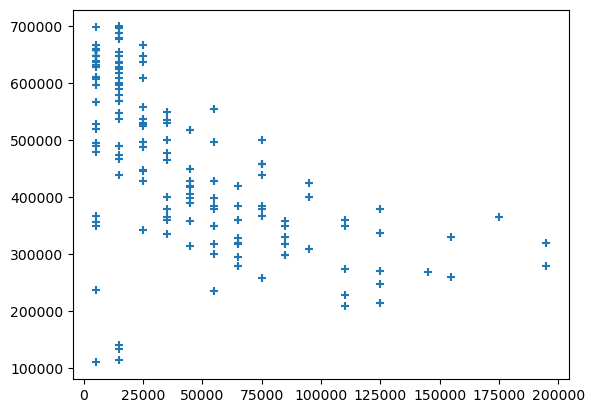

In [20]:
#scatterplot of price and average mileage
plt.scatter(df.mileage, df.price, marker = "+")

In [21]:
"""This subset represents listings with less than 25k mileage and less than 250k php in price which 
are candidates for being outliers based on business domain further analysis reveals that 4 listings 
are recent models 2019 and 2022 which are priced 134k and below this is most probably downpayment 
price which some listers place instead of full price the other entry is 16 year old model with 5k 
mileage which is highly improbable therefore we will drop these entries"""

df[(df.price<250000) & (df.mileage<25000)]


,year,transmission,price,mileage,desc,variant,E,G,J,XE,XLE
60,2019,Manual,134000,15000,2019 Toyota Vios 1.3J Financing Ok Manual,J,0,0,1,0,0
70,2019,Manual,140000,15000,2019 Toyota Vios 1.3E Manual Silver Manual,E,1,0,0,0,0
74,2007,Automatic,238000,5000,Toyota Vios G 2007 Auto,G,0,1,0,0,0
75,2022,Manual,110000,5000,2022 Toyota Vios 1.3XLE Grayish Blue Financing...,XLE,0,0,0,0,1
170,2022,Automatic,114000,15000,2022 Toyota Vios 1.3XLE Automatic All Colors Auto,XLE,0,0,0,0,1


In [22]:
#drop outlier rows
df = df.loc[~((df.price<250000) & ~(df.mileage<25000)),:]
df.head()

,year,transmission,price,mileage,desc,variant,E,G,J,XE,XLE
0,2021,Automatic,598000,5000,2021 Toyota Vios 1.3xle very fresh must see Auto,XLE,0,0,0,0,1
1,2021,Automatic,579000,15000,2021 Toyota Vios 1.3 XLE AT Automatic Gas Auto,XLE,0,0,0,0,1
2,2021,Automatic,680000,15000,Toyota Vios 1.3 XLE Auto,XLE,0,0,0,0,1
3,2021,Automatic,628000,5000,2021 Toyota Vios 1.3 XLE CVT Automatic Blackis...,XLE,0,0,0,0,1
4,2020,Automatic,698000,15000,2020 Toyota Vios 1.5 G CVT AT 2020 Toyota Vios...,G,0,1,0,0,0


In [23]:
#Get a subset of the data for EDA
df1 = df[["year", "transmission", "mileage", "variant", "price"]]
df1.head()

,year,transmission,mileage,variant,price
0,2021,Automatic,5000,XLE,598000
1,2021,Automatic,15000,XLE,579000
2,2021,Automatic,15000,XLE,680000
3,2021,Automatic,5000,XLE,628000
4,2020,Automatic,15000,G,698000


Text(0.5, 1.0, 'Distribution by Year of Manufacture')

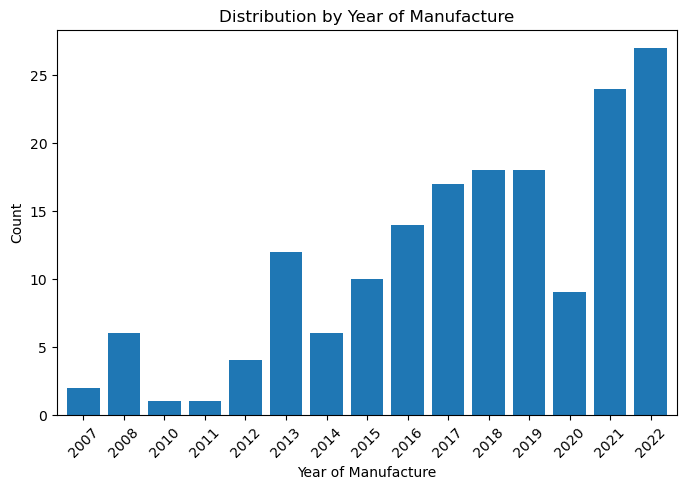

In [24]:
#listing distribution by car year manufactured
df1.year.value_counts().sort_index().plot(kind="bar", width=0.8, figsize=(8,5), rot=45)
plt.ylabel("Count")
plt.xlabel("Year of Manufacture")
plt.title("Distribution by Year of Manufacture")
#Majority of the car listings are recent year models with 2022 models as the most listed

Text(0.5, 1.0, 'Distribution by Car Variant')

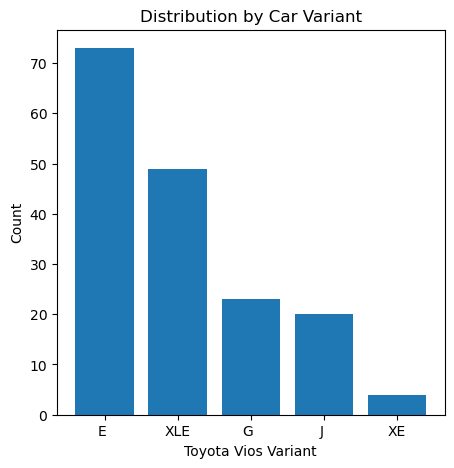

In [25]:
#listing distribution by car variant
df1.variant.value_counts().plot(kind="bar", width=0.8, figsize=(5,5), rot=0)
plt.ylabel("Count")
plt.xlabel("Toyota Vios Variant")
plt.title("Distribution by Car Variant")
#Most of the listings are Toyota Vios variant E
#least listed model is Toyota Vios variant XE

Text(0.5, 1.0, 'Toyota Vios Variant Distribution')

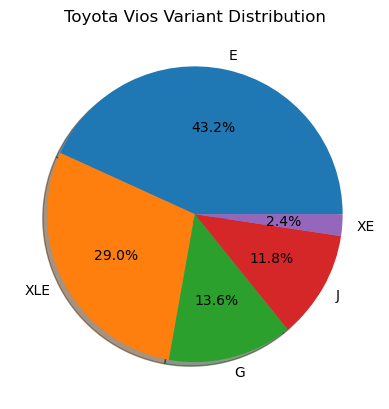

In [26]:
#Pie chart to see percentage distributions
df1.variant.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True, ylabel='')
plt.title("Toyota Vios Variant Distribution")
#43% of the whole listing is variant E

Text(0.5, 1.0, 'Toyota Vios Approximate Mileage Distribution')

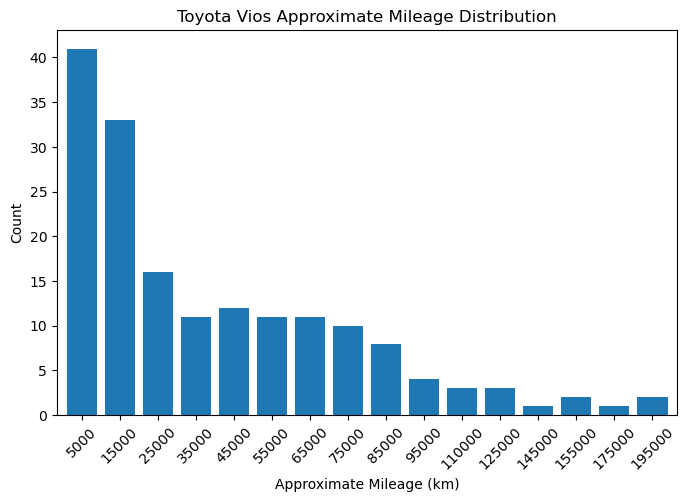

In [27]:
#listing distribution by approximate mileage
df1.mileage.value_counts().sort_index().plot(kind="bar", width=0.8, figsize=(8,5), rot=45)
plt.ylabel("Count")
plt.xlabel("Approximate Mileage (km)")
plt.title("Toyota Vios Approximate Mileage Distribution")
#majority of the listing are in the low mileage category with 5000 (0-10000 km)

Text(0.5, 1.0, 'Toyota Vios Transmission Type Distribution')

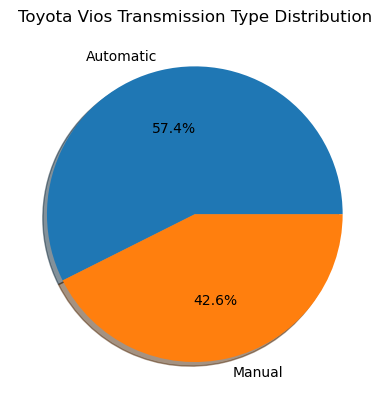

In [28]:
#listing distribution of different transmission types
df1.transmission.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True, ylabel='')
plt.title("Toyota Vios Transmission Type Distribution")
#Automatic transmission account for a larger percentage of the listing but not by much

Text(0.5, 1.0, 'Price distribution')

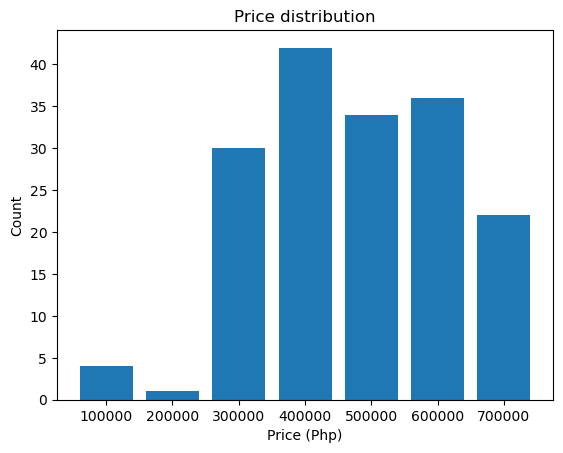

In [29]:
#price distributions
intervals = [x for x in range(50000,850000,100000)]
plt.hist(df.price, bins=intervals, rwidth= 0.8)
plt.xlabel("Price (Php)")
plt.ylabel("Count")
plt.title("Price distribution")
#Majority of the listing proces fall within 300k - 600k Php price range

In [30]:
#save cleaned data for Part 3 Machine Learning model
df2 = df.drop(["desc", "variant"], axis = "columns").reset_index(drop=True)
df2

,year,transmission,price,mileage,E,G,J,XE,XLE
0,2021,Automatic,598000,5000,0,0,0,0,1
1,2021,Automatic,579000,15000,0,0,0,0,1
2,2021,Automatic,680000,15000,0,0,0,0,1
3,2021,Automatic,628000,5000,0,0,0,0,1
4,2020,Automatic,698000,15000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
164,2018,Manual,488000,25000,0,0,1,0,0
165,2017,Manual,449000,45000,1,0,0,0,0
166,2016,Manual,365000,175000,1,0,0,0,0
167,2017,Manual,440000,75000,1,0,0,0,0


In [31]:
df2.to_csv("market data clean for ML.csv")